In [1]:
%cd ..


/Users/eliaweiss/ai/segmentation/MobileSAM


In [2]:
import numpy as np
from tblDetect.TableDetect import TableDetect
from tblDetect.MobileSamBoxes import MobileSamBoxes
import matplotlib.pyplot as plt
from PIL import Image
from notebooks.Utils import plot_results, plot_annotations,plot_rotatedResult,applyRotatedResult
from tblDetect.AlignTable_Processor import AlignTable_Processor
from tblDetect.TblStructureDetect import TblStructureDetect

/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: UserWarning: Overwriting tiny_vit_5m_224 in registry with tinyvit.tiny_vit.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: UserWarning: Overwriting tiny_vit_11m_224 in registry with tinyvit.tiny_vit.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: UserWarning: Overwriting tiny_vit_21m_224 in registry with tinyvit.tiny_vit.tiny_vit_21m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: U

In [3]:
# init detectors
tblDec = TableDetect()
sam = MobileSamBoxes()
tblStructDetect = TblStructureDetect()       

checkpoint_load_scucess


In [4]:
file_list = ["/Users/eliaweiss/Documents/doc2txt/invoices 2/expense (6).jpeg", 
              "/Users/eliaweiss/Documents/doc2txt/sihach/attachments/img/20231025012642_001.jpg",
              "/Users/eliaweiss/Documents/doc2txt/sihach/need fix/4e7d4235deff4ee2b72d886e12ad0bcf.jpg"]

In [5]:
import os
folder = "/Users/eliaweiss/Documents/doc2txt/lineCv/1"
file_list = os.listdir(folder)
file_list = [file for file in file_list if 
             ".jpg" in file 
             or ".png" in file 
             or ".jpeg" in file]


In [6]:
fileIter = iter(file_list)
cc = 0

# align table

In [7]:
import cv2

while True:
    file_path = next(fileIter)
    cc+=1    
    if cc < 17:
        continue
    print(cc)
    
    file_path = os.path.join(folder, file_path)
    print(file_path)

    img = Image.open(file_path)

    # detect table
    probas, boxes = tblDec.detectTables(img)
    if len(boxes):
        # find table mask
        anns = sam.process(img,boxes)
    else:
        print("no tbl found!")
        anns = []
    

    tmpImg = np.array(img)

    for ann in anns:
        alignTable_processor = AlignTable_Processor(img, ann)
        tbl_patch_pil = alignTable_processor.getAlignTable()
        cells = tblStructDetect.detectTableStructure(tbl_patch_pil)
        rotated_cells =  alignTable_processor.unRotateAllCell(cells)
        applyRotatedResult(tmpImg, rotated_cells)
    
    cv2.imshow("tmpImg",tmpImg)
    cv2.waitKey()
    

# pil_img = Image.fromarray(tmpImg)
# plt.figure(figsize=(16,10))
# plt.imshow(pil_img)
# plt.axis('off')
# plt.show() 

17
/Users/eliaweiss/Documents/doc2txt/lineCv/1/12.png
shape (5848, 4132, 3)
------ total time: (s): 1.77


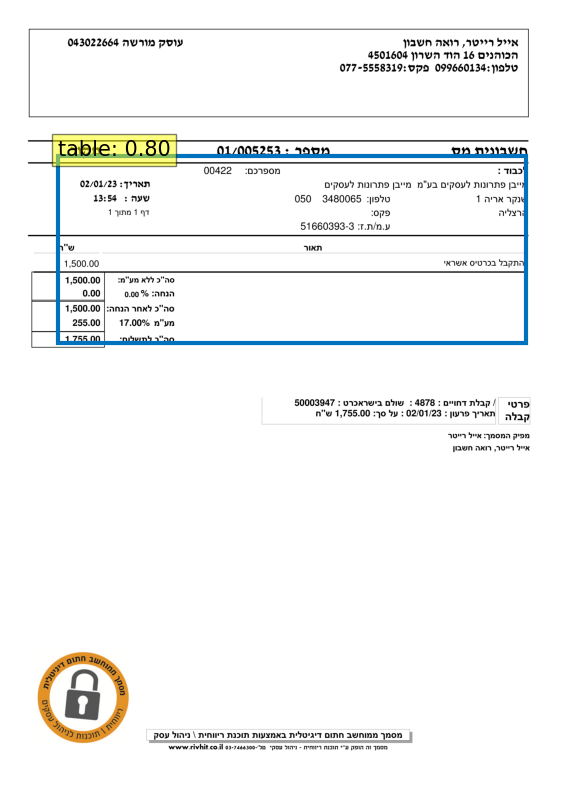

In [ ]:
probas, boxes = tblDec.detectTables(img)

plot_results(tblDec.model, img, probas, boxes)


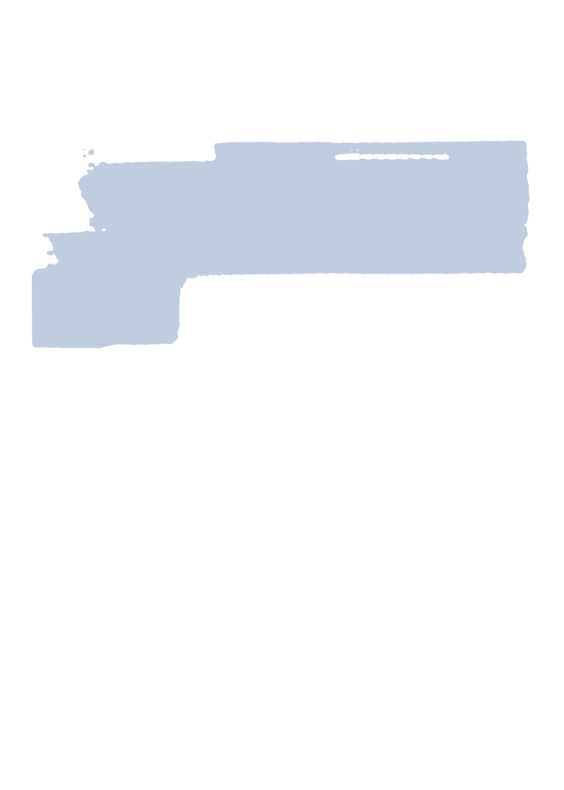

In [ ]:
plot_annotations(img, anns)

In [ ]:
tbl_patch_pil = alignTable_processor.getAlignTable()


In [ ]:
tbl_patch_pil.size

(0, 2037)